<a href="https://colab.research.google.com/github/vivekpenuli/sh/blob/main/Final_Major_project_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing pandas library for Data manipulation

In [30]:
import pandas as pd

url of file where the csv file is importing

In [31]:
url="https://raw.githubusercontent.com/vivekpenuli/healthcare/main/Churn%20-%20Sheet1.csv"

In [32]:
df=pd.read_csv(url)

Top 5 elements of file

In [33]:
df.head(5)

,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineBackup,Contract,PaperlessBilling,Churn
0,29.85,Female,0.0,Yes,No,1.0,DSL,Yes,Month-to-month,Yes,No
1,56.95,Male,0.0,No,No,34.0,DSL,No,One year,No,No
2,53.85,Male,0.0,No,No,2.0,DSL,Yes,Month-to-month,Yes,Yes
3,42.30,Male,0.0,No,No,45.0,DSL,No,One year,No,No
4,70.70,Female,0.0,No,No,2.0,Fiber optic,No,Month-to-month,Yes,Yes


Data Type of  each Columns 

In [34]:
df.dtypes

MonthlyCharges      float64
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
InternetService      object
OnlineBackup         object
Contract             object
PaperlessBilling     object
Churn                object
dtype: object

printing unique elements present in each columns

In [35]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [38]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [39]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Replacing " No Internet Service" to No 

In [40]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [41]:
df.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

Replacing yes or No present in each columns to 1 and 0 because machine algo understand Numeric values only

In [42]:
yes_no_columns = ['Partner','Dependents','OnlineBackup',
                  'Churn','PaperlessBilling']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

Replacing Male and Female to 0 and 1

In [43]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [44]:
df.head(5)

,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineBackup,Contract,PaperlessBilling,Churn
0,29.85,1,0.0,1,0,1.0,DSL,1,Month-to-month,1,0
1,56.95,0,0.0,0,0,34.0,DSL,0,One year,0,0
2,53.85,0,0.0,0,0,2.0,DSL,1,Month-to-month,1,1
3,42.30,0,0.0,0,0,45.0,DSL,0,One year,0,0
4,70.70,1,0.0,0,0,2.0,Fiber optic,0,Month-to-month,1,1


Converting string value into numeric value

In [45]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract'])
df1.columns

Index(['MonthlyCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'OnlineBackup', 'PaperlessBilling', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

In [46]:
df1.head(5)

,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineBackup,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,29.85,1,0.0,1,0,1.0,1,1,0,1,0,0,1,0,0
1,56.95,0,0.0,0,0,34.0,0,0,0,1,0,0,0,1,0
2,53.85,0,0.0,0,0,2.0,1,1,1,1,0,0,1,0,0
3,42.30,0,0.0,0,0,45.0,0,0,0,1,0,0,0,1,0
4,70.70,1,0.0,0,0,2.0,0,1,1,0,1,0,1,0,0


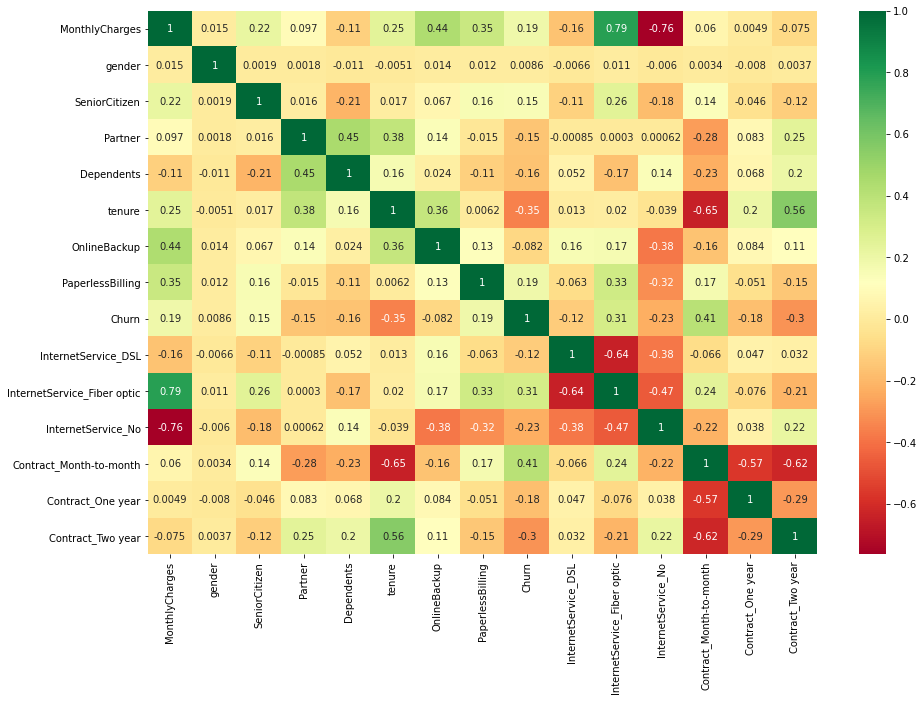

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat=df1.corr()
top=corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(df1[top].corr(),annot=True,cmap='RdYlGn')

Removing Target Column From the table

In [48]:

target_name="Churn"
X = df1.drop('Churn', axis=1)
y=df1[target_name]

Train Test Split of Data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [51]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
pre=logreg.predict(X_test)

In [53]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')


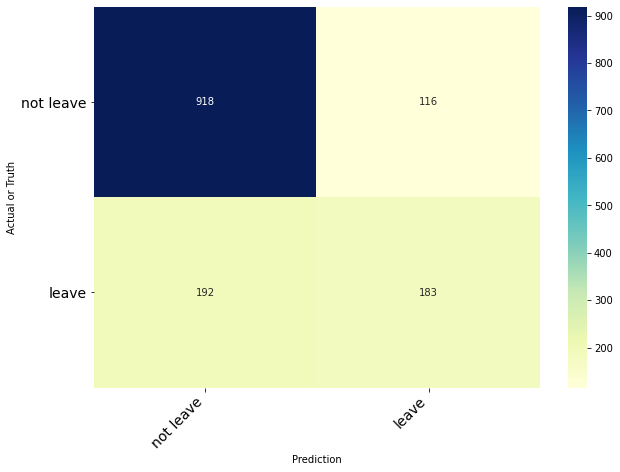

In [54]:
cm = confusion_matrix(y_test,pre)
print_confusion_matrix(cm,["not leave","leave"])

In [55]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1034
           1       0.61      0.49      0.54       375

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Decision Tree

In [56]:

treemodel = tree.DecisionTreeClassifier()
skk=StratifiedKFold(shuffle=True,n_splits=10)
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
score3=cross_val_score(treemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score3.mean())

0.7323441416928058


In [58]:

score2=cross_val_score(treemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score2.mean())

0.7281610942249241


In [59]:
pretree=treemodel.predict(X_test)

In [60]:
print(classification_report(y_test,pretree))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1034
           1       0.50      0.51      0.51       375

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.74      0.74      0.74      1409



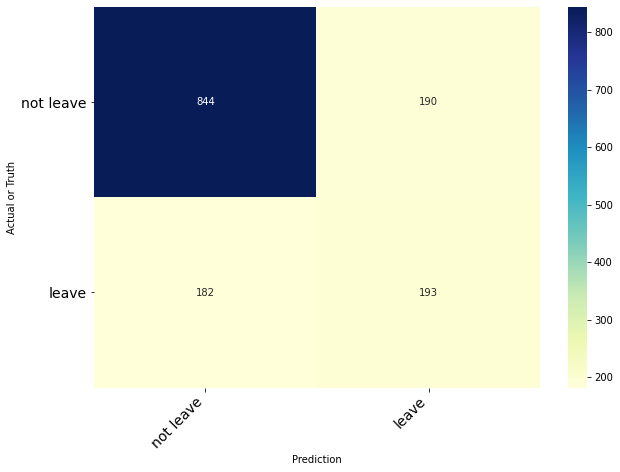

In [61]:
cm = confusion_matrix(y_test,pretree)
print_confusion_matrix(cm,["not leave","leave"])

Random Forest

In [62]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
rpretree=rf.predict(X_test)

In [64]:

score7=cross_val_score(rf,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score7.mean())

0.7818553720569896


In [65]:
score8=cross_val_score(rf,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score8.mean())

0.7693262411347518


In [66]:
print(classification_report(y_test,rpretree))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1034
           1       0.57      0.46      0.51       375

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409



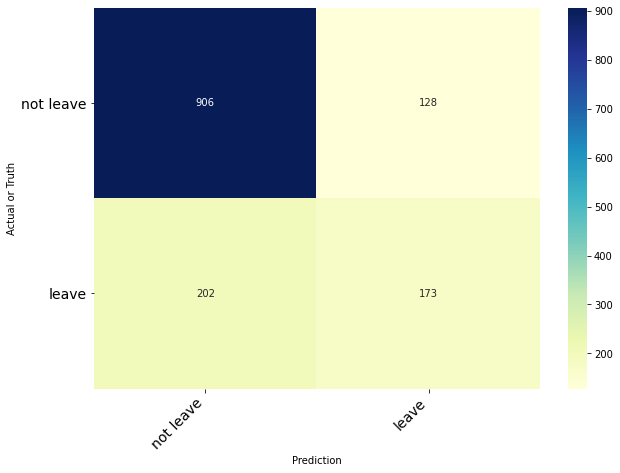

In [67]:
cm = confusion_matrix(y_test,rpretree)
print_confusion_matrix(cm,["not leave","leave"])

In [68]:
import pickle

In [69]:
with open('Telecom','wb') as file: 
  pickle.dump(logreg,file)

In [70]:

with open('Telecom','rb') as file:    
  Telecom= pickle.load(file)

In [71]:
Telecom.predict([[29,1,0,1,0,1,1,1,1,0,0,1,0,0]])

array([0])